In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [121]:
def make_graphs(df):
    fig, axs = plt.subplots(3,figsize=(10,15))
    ind = np.arange(1,5)
    models = ['LogReg', 'RandomForest', 'GradientBoosting', 'XGBoost']

    # Accuracy
    acc_max = np.max(df['test_accuracy']) + 0.01
    acc_min = np.min(df['test_accuracy']) - 0.01
    pl, pr, pg, px = axs[0].bar(ind, df['test_accuracy'])
    pl.set_facecolor('r')
    pr.set_facecolor('g')
    pg.set_facecolor('b')
    px.set_facecolor('purple')
    axs[0].set_xticks(ind)
    axs[0].set_xticklabels(models)
    axs[0].set_ylabel('Accuracy')
    axs[0].set_title('Test Accuracy on models')
    axs[0].set_ylim(acc_min, acc_max)   
    
    # Log Loss
    log_max = np.max(df['test_neg_log_loss']) + 0.05
    log_min = np.min(df['test_neg_log_loss']) - 0.05
    pl, pr, pg, px = axs[1].bar(ind, df['test_neg_log_loss'])
    pl.set_facecolor('r')
    pr.set_facecolor('g')
    pg.set_facecolor('b')
    px.set_facecolor('purple')
    axs[1].set_xticks(ind)
    axs[1].set_xticklabels(models)
    axs[1].set_ylabel('Log Loss')
    axs[1].set_title('Test Log Loss on models')
    axs[1].set_ylim(log_min, log_max)  
    
    # ROC AUC
    roc_max = np.max(df['test_roc_auc']) + 0.01
    roc_min = np.min(df['test_roc_auc']) - 0.01
    pl, pr, pg, px = axs[2].bar(ind, df['test_roc_auc'])
    pl.set_facecolor('r')
    pr.set_facecolor('g')
    pg.set_facecolor('b')
    px.set_facecolor('purple')
    axs[2].set_xticks(ind)
    axs[2].set_xticklabels(models)
    axs[2].set_ylabel('ROC AUC')
    axs[2].set_title('Test ROC AUC on models')
    axs[2].set_ylim(roc_min, roc_max)

# Model Metrics (k=10)

The following are metrics for the 4 different models tested on 4 different datasets. All were used with k-fold cross validation (k=10), and Matrix Factorization for value imputation when applicable.

In [130]:
all_feat_dx_10 = pd.read_csv('csv_10/all_dx.csv', index_col=0)
all_feat_dxsub_10 = pd.read_csv('csv_10/all_dxsub.csv', index_col=0)
#tmcq_dx_10 = pd.read_csv('csv/TMCQ_dx.csv', index_col=0)
#neuro_dx_10 = pd.read_csv('csv/neuro_dx.csv', index_col=0)

## All Features, DX

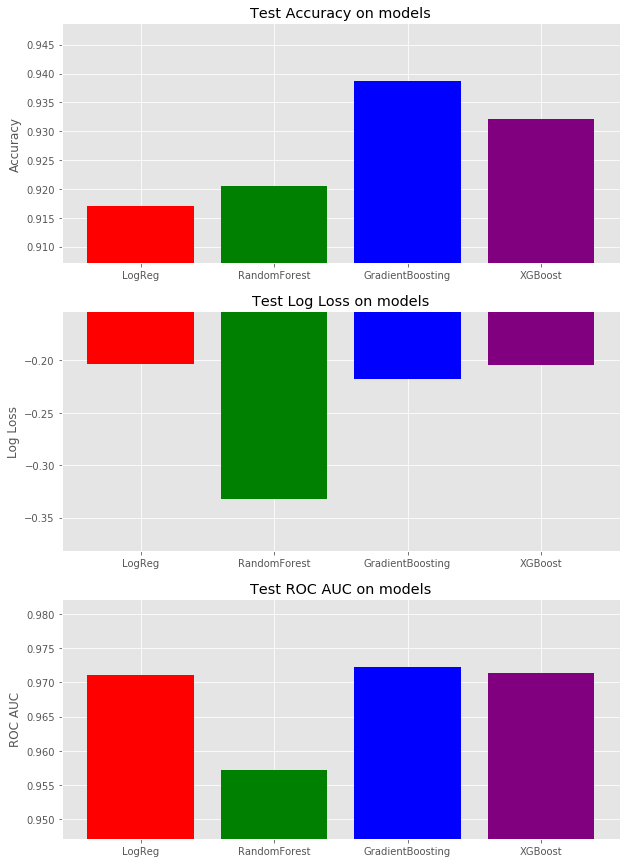

In [131]:
make_graphs(all_feat_dx_10)

## All Features, DXSUB

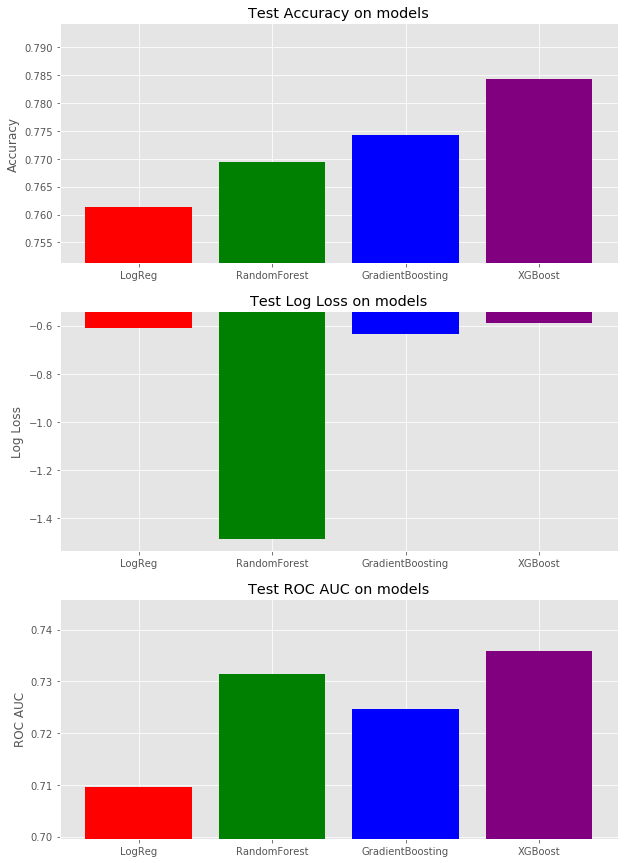

In [132]:
make_graphs(all_feat_dxsub_10)

## TMCQ, DX

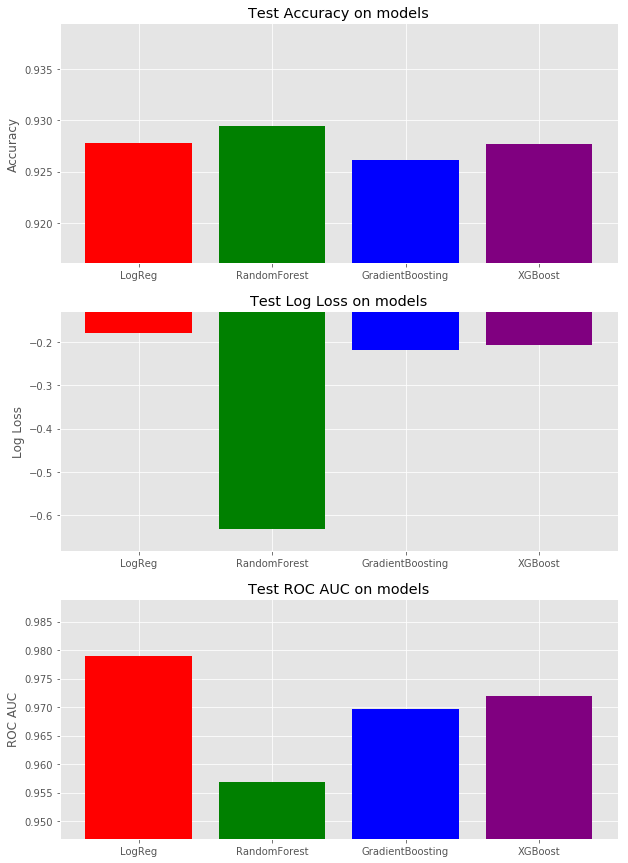

In [124]:
make_graphs(tmcq_dx_10)

## Neuro, DX

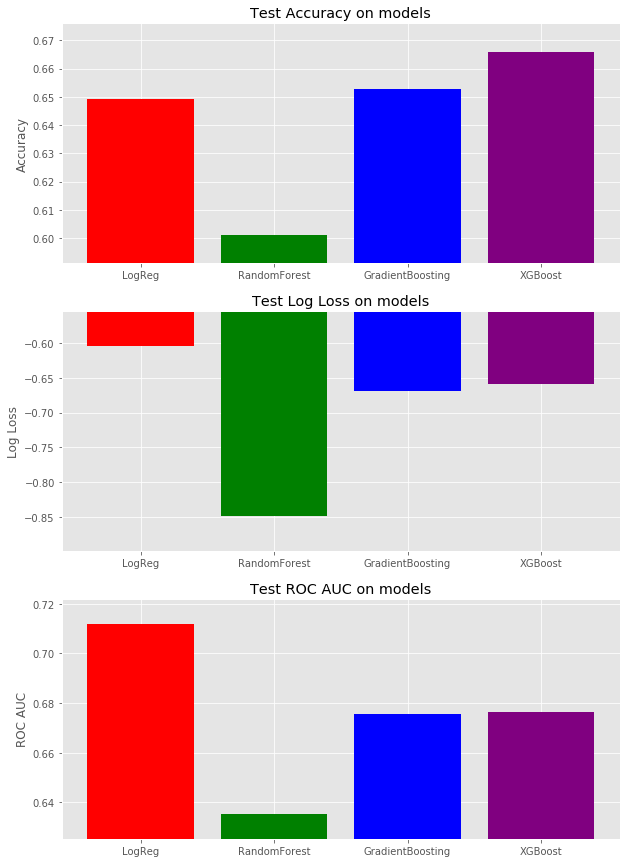

In [125]:
make_graphs(neuro_dx_10)

### All Feats, DXSUB, ROC_AUC information

In [133]:
!head csv_10/multiclass.txt

[0.9002229654403568, 0.7115384615384616, 0.5, 0.783068783068783, 62]
[0.9298093841642229, 0.6878171963537816, 0.5, 0.8463404184748058, 541]
[0.8775743707093822, 0.55, 0.5, 0.8453159041394336, 61]
[0.9297222222222222, 0.6967551622418879, 0.5, 0.8308815426997245, 542]
[0.9170480549199085, 0.7303921568627451, 0.5, 0.8229847494553377, 61]
[0.926374269005848, 0.6634218289085546, 0.5, 0.8292148760330579, 542]
[0.9186602870813398, 0.6900000000000001, 0.5, 0.8013468013468013, 60]
[0.9325739722440429, 0.6845474613686534, 0.5, 0.838307569808627, 543]
[0.8923444976076556, 0.57, 0.5, 0.7407407407407409, 60]
[0.9315483983590818, 0.6978660779985284, 0.5, 0.8536215370253424, 543]


In [168]:
multiclass = pd.read_table('csv_10/multiclass.txt',delimiter=',',
              names=['Class1', 'Class3', 'Class4', 'Class5', 'size'])

In [171]:
multiclass['Class1'] = multiclass['Class1'].str.strip('[')
multiclass['size'] = multiclass['size'].str.strip(']')

In [173]:
multiclass['Class1'] = multiclass['Class1'].astype('float')
multiclass['size'] = multiclass['size'].astype('int')

In [196]:
log_reg_model = multiclass.loc[0:19]
rf_model = multiclass.loc[20:39]
gb_model = multiclass.loc[40:59]
xgb_model = multiclass.loc[60:79]

In [213]:
def split_dfs(df):
    train = df.iloc[1:20:2]
    test = df.iloc[0:19:2]
    return train, test

In [214]:
lr_train, lr_test = split_dfs(log_reg_model)
rf_train, rf_test = split_dfs(rf_model)
gb_train, gb_test = split_dfs(gb_model)
xgb_train, xgb_test = split_dfs(xgb_model)

In [223]:
xgb_train.mean()

Class1      0.993102
Class3      0.969122
Class4      0.954351
Class5      0.983436
size      542.700000
dtype: float64

In [224]:
index = ['LogReg', 'RandomForest', 'GradientBoosting', 'XGBoost']
columns = ['Class1', 'Class3', 'Class4', 'Class5', 'size']
roc_multiclass_metrics_train = pd.DataFrame(data=None,
                                      index=index,
                                      columns=columns)

In [229]:
roc_multiclass_metrics_train.loc['LogReg',:] = lr_train.mean()
roc_multiclass_metrics_train.loc['RandomForest',:] = rf_train.mean()
roc_multiclass_metrics_train.loc['GradientBoosting',:] = gb_train.mean()
roc_multiclass_metrics_train.loc['XGBoost',:] = xgb_train.mean()

In [233]:
roc_multiclass_metrics_train.drop(columns='size')

,Class1,Class3,Class4,Class5
LogReg,0.930126,0.686871,0.5,0.844093
RandomForest,0.987625,0.959687,0.923889,0.975931
GradientBoosting,0.997379,0.981897,0.949444,0.990123
XGBoost,0.993102,0.969122,0.954351,0.983436


In [234]:
roc_multiclass_metrics_test = pd.DataFrame(data=None,
                                      index=index,
                                      columns=columns)

In [235]:
roc_multiclass_metrics_test.loc['LogReg',:] = lr_test.mean()
roc_multiclass_metrics_test.loc['RandomForest',:] = rf_test.mean()
roc_multiclass_metrics_test.loc['GradientBoosting',:] = gb_test.mean()
roc_multiclass_metrics_test.loc['XGBoost',:] = xgb_test.mean()

In [237]:
roc_multiclass_metrics_test.drop(columns='size')

,Class1,Class3,Class4,Class5
LogReg,0.911771,0.634173,0.5,0.792424
RandomForest,0.919305,0.645192,0.55,0.81123
GradientBoosting,0.923021,0.676173,0.498319,0.801222
XGBoost,0.930368,0.68029,0.525,0.808008


# Model Metrics (k=5)

The following are metrics for the 4 different models tested on 4 different datasets. All were used with k-fold cross validation (k=5), and Matrix Factorization for value imputation when applicable.

In [15]:
all_feat_dx = pd.read_csv('csv/all_feat_dx.csv', index_col=0)
all_feat_dxsub = pd.read_csv('csv/all_feat_dxsub.csv', index_col=0)
tmcq_dx = pd.read_csv('csv/TMCQ_dx.csv', index_col=0)
neuro_dx = pd.read_csv('csv/neuro_dx.csv', index_col=0)

In [16]:
all_feat_dx

,fit_time,score_time,test_accuracy,test_neg_log_loss,test_roc_auc
LogReg,7.359195,6.148368,0.908857,-0.210793,0.970855
RandomForest,9.452390,11.709227,0.928719,-0.427597,0.955042
GradientBoosting,11.417555,18.912921,0.933705,-0.227142,0.967760
XGB,13.787223,24.229599,0.927080,-0.211612,0.969984


In [121]:
def make_graphs(df):
    fig, axs = plt.subplots(3,figsize=(10,15))
    ind = np.arange(1,5)
    models = ['LogReg', 'RandomForest', 'GradientBoosting', 'XGBoost']

    # Accuracy
    acc_max = np.max(df['test_accuracy']) + 0.01
    acc_min = np.min(df['test_accuracy']) - 0.01
    pl, pr, pg, px = axs[0].bar(ind, df['test_accuracy'])
    pl.set_facecolor('r')
    pr.set_facecolor('g')
    pg.set_facecolor('b')
    px.set_facecolor('purple')
    axs[0].set_xticks(ind)
    axs[0].set_xticklabels(models)
    axs[0].set_ylabel('Accuracy')
    axs[0].set_title('Test Accuracy on models')
    axs[0].set_ylim(acc_min, acc_max)   
    
    # Log Loss
    log_max = np.max(df['test_neg_log_loss']) + 0.05
    log_min = np.min(df['test_neg_log_loss']) - 0.05
    pl, pr, pg, px = axs[1].bar(ind, df['test_neg_log_loss'])
    pl.set_facecolor('r')
    pr.set_facecolor('g')
    pg.set_facecolor('b')
    px.set_facecolor('purple')
    axs[1].set_xticks(ind)
    axs[1].set_xticklabels(models)
    axs[1].set_ylabel('Log Loss')
    axs[1].set_title('Test Log Loss on models')
    axs[1].set_ylim(log_min, log_max)  
    
    # ROC AUC
    roc_max = np.max(df['test_roc_auc']) + 0.01
    roc_min = np.min(df['test_roc_auc']) - 0.01
    pl, pr, pg, px = axs[2].bar(ind, df['test_roc_auc'])
    pl.set_facecolor('r')
    pr.set_facecolor('g')
    pg.set_facecolor('b')
    px.set_facecolor('purple')
    axs[2].set_xticks(ind)
    axs[2].set_xticklabels(models)
    axs[2].set_ylabel('ROC AUC')
    axs[2].set_title('Test ROC AUC on models')
    axs[2].set_ylim(roc_min, roc_max)

# All Features, DX

In [126]:
all_feat_dx

,fit_time,score_time,test_accuracy,test_neg_log_loss,test_roc_auc
LogReg,7.359195,6.148368,0.908857,-0.210793,0.970855
RandomForest,9.452390,11.709227,0.928719,-0.427597,0.955042
GradientBoosting,11.417555,18.912921,0.933705,-0.227142,0.967760
XGB,13.787223,24.229599,0.927080,-0.211612,0.969984


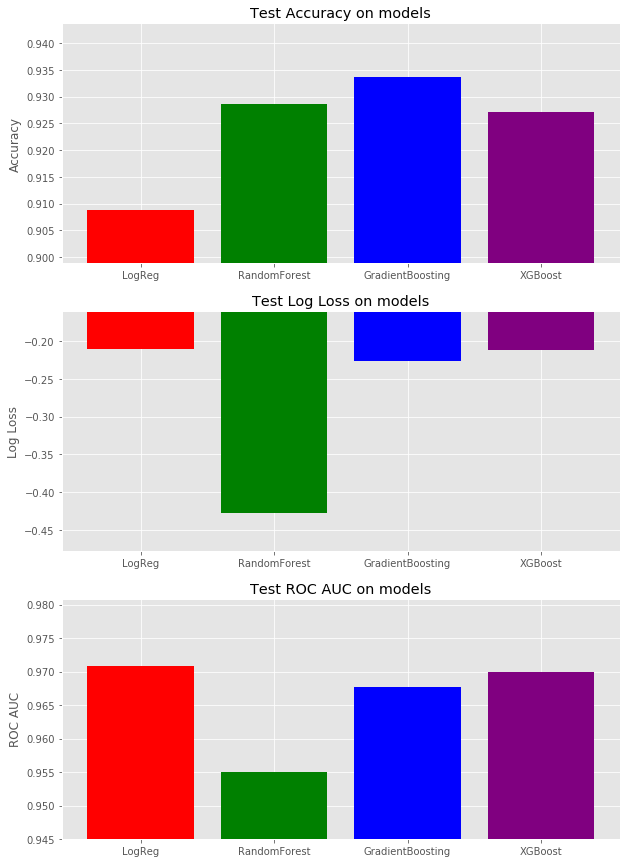

In [122]:
make_graphs(all_feat_dx)

# All Features, DXSUB

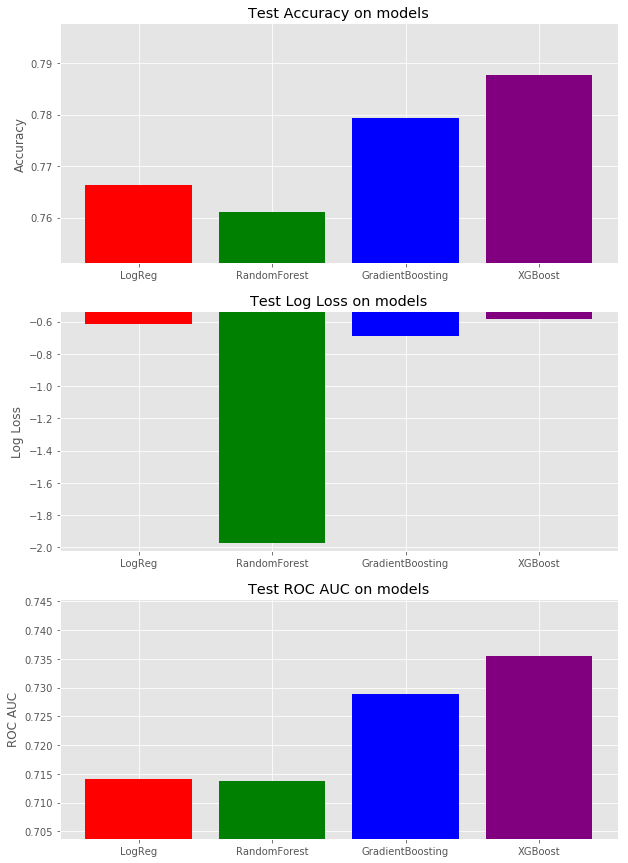

In [123]:
make_graphs(all_feat_dxsub)

# TMCQ, DX

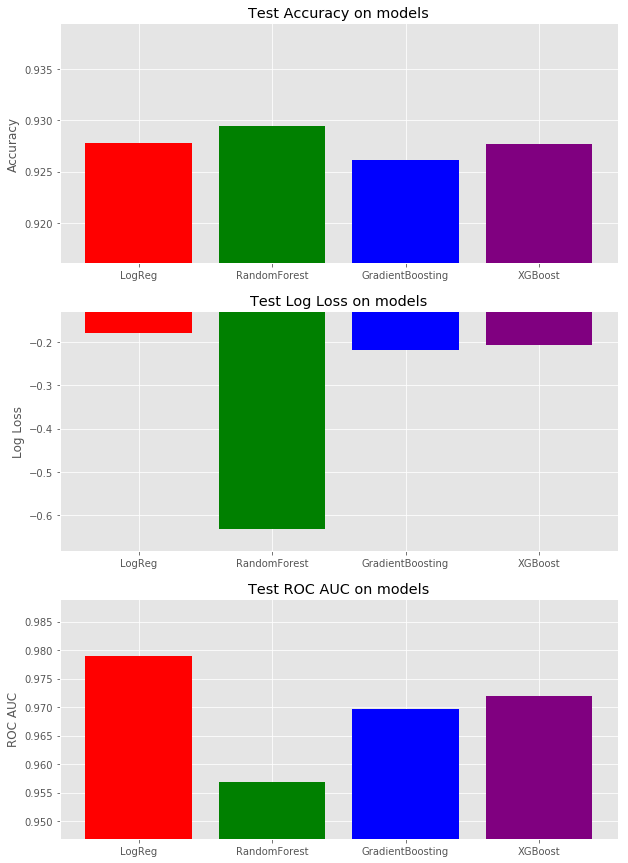

In [124]:
make_graphs(tmcq_dx)

# Neuro, DX

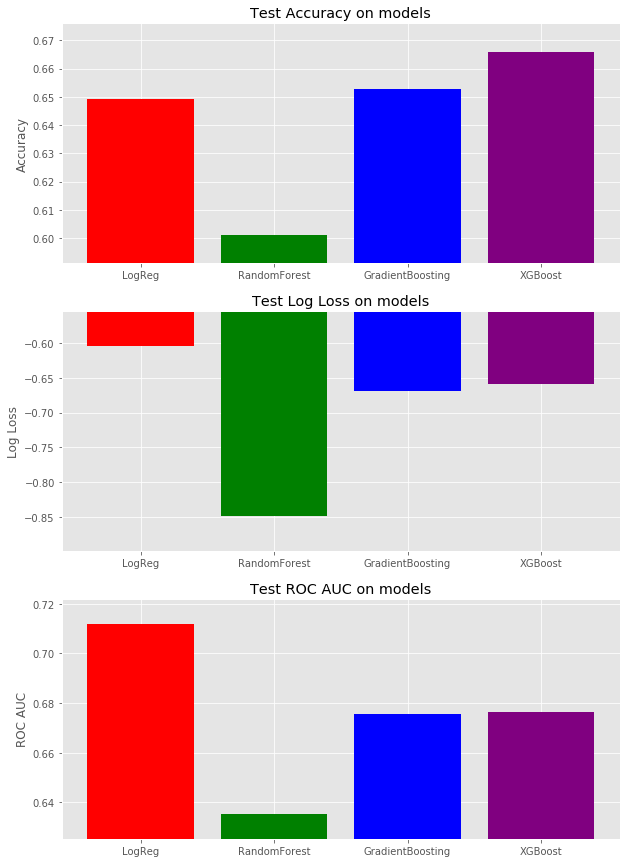

In [125]:
make_graphs(neuro_dx)

## Conclusions:
LogReg and XGBoost are the regular winners. For smaller datasets (TMCQ and Neuro), LogReg outperforms.